In [1]:
from torchgeo.datamodules import LEVIRCDPlusDataModule
from torchgeo.datasets import unbind_samples
from torchgeo.transforms import AugmentationSequential
from torchgeo.transforms.transforms import _RandomNCrop

In [2]:
aug = AugmentationSequential(
    _RandomNCrop(size=(512, 512), num=8), data_keys=["image1", "image2", "mask"]
)

In [3]:
root = "/workspace/storage/data/levircdplus"
dm = LEVIRCDPlusDataModule(root=root, batch_size=8, patch_size=512)
dm.setup(stage="fit")

In [19]:
dl = iter(dm.train_dataloader())
batch = next(dl)

In [20]:
for k, v in batch.items():
    print(k, v.shape, v.dtype)

image1 torch.Size([1, 3, 1024, 1024]) torch.float32
image2 torch.Size([1, 3, 1024, 1024]) torch.float32
mask torch.Size([1, 1024, 1024]) torch.int64


In [21]:
batch = aug(batch)

In [22]:
for k, v in batch.items():
    print(k, v.shape, v.dtype)

image1 torch.Size([8, 3, 512, 512]) torch.float32
image2 torch.Size([8, 3, 512, 512]) torch.float32
mask torch.Size([8, 512, 512]) torch.int64


In [23]:
sample = unbind_samples(batch)[6]

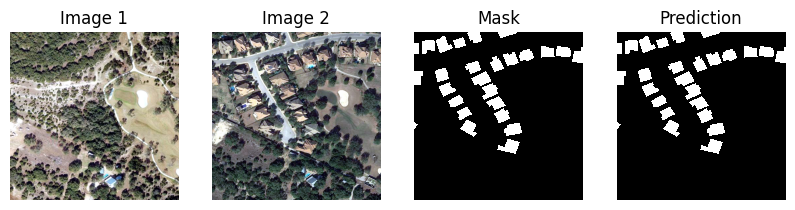

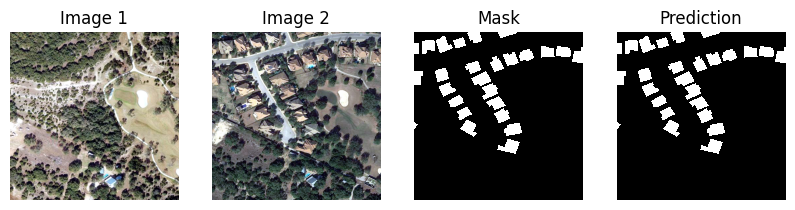

In [24]:
sample = unbind_samples(batch)[0]
sample["prediction"] = sample["mask"].clone()
dm.plot(sample)